In [7]:
from Node import Node
import networkx as nx

In [8]:
def discard(nodes, i, j):
    for node in nodes:
        if node.i == i and node.j == j:
            nodes.discard(node)
            break

def dfs(matrix, size, i=0, j=0, currentNode=Node('S',0,0,0), pathToReturn=set([Node('S',0,0,0)]), visited=set([(0,0)])):
    # down,right operator
    try:
        if( matrix[i+1][j+1]!='X' and matrix[i][j+1]!='X' and matrix[i+1][j]!='X' and i < size-1 and j < size-1 and (i+1,j+1) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i+1 and node.j == j+1]
            if(not nextNode):
                nextNode = Node(matrix[i+1][j+1], i+1, j+1, currentNode.distance+1, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+1):
                discard(pathToReturn, i+1, j+1)
                nextNode.parent = currentNode
                pathToReturn.add(nextNode)
            visited.add((i+1,j+1))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i+1,j+1,nextNode,pathToReturn,visited)
    except:
        {}
    # down,left operator
    try:
        if(matrix[i+1][j-1] != 'X' and matrix[i+1][j] != 'X' and matrix[i][j-1] != 'X' and i < size-1 and j > 0 and (i+1,j-1) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i+1 and node.j == j-1]
            if(not nextNode):
                nextNode = Node(matrix[i+1][j+1], i+1, j-1, currentNode.distance+1, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+1):
                discard(pathToReturn, i+1, j-1)
                nextNode.parent = currentNode
                pathToReturn.add(nextNode)
            visited.add((i+1,j-1))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i+1,j-1,nextNode,pathToReturn,visited)   
    except:
        {}
    # up,right operator
    try:
        if(matrix[i-1][j+1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j+1] != 'X' and i > 0 & j < size-1 and (i-1,j+1) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i-1 and node.j == j+1]
            if(not nextNode):
                nextNode = Node(matrix[i-1][j+1], i-1, j+1, currentNode.distance+1, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+1):
                discard(pathToReturn, i-1, j+1)
                nextNode.parent = currentNode
                pathToReturn.add(nextNode)
            visited.add((i-1,j+1))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i-1,j+1,nextNode,pathToReturn,visited)
    except:
        {}
    # left,up operator
    try:
        if(matrix[i-1][j-1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j-1] != 'X' and j > 0 & i > 0 and (i-1,j-1) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i-1 and node.j == j-1]
            if(not nextNode):
                nextNode = Node(matrix[i-1][j-1], i-1, j-1, currentNode.distance+1, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+1):
                discard(pathToReturn, i-1, j-1)
                nextNode.parent = currentNode
                pathToReturn.add(nextNode)
            visited.add((i-1,j-1))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i-1,j-1,nextNode,pathToReturn,visited)
    except:
        {}
    # right operato
    try:
        if(matrix[i][j+1] != 'X' and j < size-1 and (i,j+1) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i and node.j == j+1]
            if(not nextNode):
                nextNode = Node(matrix[i][j+1], i, j+1, currentNode.distance +2, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+2):
                discard(pathToReturn, i, j+1)
                nextNode.parent = currentNode
                pathToReturn.add(nextNode)
            visited.add((i,j+1))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i,j+1,nextNode,pathToReturn,visited)
    except:
        {}    
    # left operator
    try:
        if(matrix[i][j-1] != 'X' and j > 0 and (i,j-1) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i and node.j == j-1]
            if(not nextNode):
                nextNode = Node(matrix[i][j-1], i, j-1, currentNode.distance +2, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+2):
                discard(pathToReturn, i, j-1)
                nextNode.parent = currentNode
            visited.add((i,j-1))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i,j-1,nextNode,pathToReturn,visited)
    except:
        {}
    # down operator
    try:
        if(matrix[i+1][j] != 'X' and i < size-1 and (i+1,j) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i+1 and node.j == j]
            if(not nextNode):
                nextNode = Node(matrix[i+1][j], i+1, j, currentNode.distance +2, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+2):
                discard(pathToReturn, i+1, j)
                nextNode.parent = currentNode
            visited.add((i+1,j))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i+1,j,nextNode,pathToReturn,visited)
    except:
        {}
    # up operator
    try:
        if(matrix[i-1][j] != 'X' and i > 0 and (i-1,j) not in visited):
            nextNode = [node for node in pathToReturn if node.i == i-1 and node.j == j]
            if(not nextNode):
                nextNode = Node(matrix[i][j+1], i-1, j, currentNode.distance +2, currentNode)
            else:
                nextNode = nextNode[0]
            if(nextNode.distance > currentNode.distance+2):
                discard(pathToReturn, i-1, j)
                nextNode.parent = currentNode
            visited.add((i-1,j))
            pathToReturn.add(nextNode)
            dfs(matrix,size,i-1,j,nextNode,pathToReturn,visited)
    except:
        {}
    return pathToReturn, visited

In [9]:
def manhattanDistance(i1, j1, i2, j2):
    return abs(i1 - i2) + abs(j1 - j2)

def moveNode(open, closed, i, j):
    for node in open:
        if node.i == i and node.j == j:
            open.remove(node)
            closed.append(node)
            break

def gbfs(matrix, size):
    open = list([Node('S',0,0,0)])
    closed = list()
    visited = set([(0,0)])
    i = 0
    j = 0
    goalCordinates = (size-1,size-1)
    
    while(len(open) != 0):
        
        # find the Node with the closest manhattan distance to the goal
        currentNode = None
        closestDistance = float('inf')
        for node in open:
            distance = manhattanDistance(node.i, node.j, goalCordinates[0], goalCordinates[1])
            if distance < closestDistance:
                currentNode = node
                closestDistance = distance

        # down,right operator
        try:
            if( matrix[i+1][j+1]!='X' and matrix[i][j+1]!='X' and matrix[i+1][j]!='X' and i < size-1 and j < size-1 and (i+1,j+1) not in visited):
                open.append(Node(matrix[i+1][j+1], i+1, j+1, currentNode.distance+1, currentNode))
                visited.add((i+1,j+1))
        except:
            {}
         # down,left operator
        try:
            if(matrix[i+1][j-1] != 'X' and matrix[i+1][j] != 'X' and matrix[i][j-1] != 'X' and i < size-1 and j > 0 and (i+1,j-1) not in visited):
                open.append(Node(matrix[i+1][j-1], i+1, j-1, currentNode.distance+1, currentNode))
                visited.add((i+1,j-1))
        except:
            {}
        # up,right operator
        try:
            if(matrix[i-1][j+1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j+1] != 'X' and i > 0 & j < size-1 and (i-1,j+1) not in visited):
                open.append(Node(matrix[i-1][j+1], i-1, j+1, currentNode.distance+1, currentNode))
                visited.add((i-1,j-1))
        except:
            {}
         # left,up operator
        try:
            if(matrix[i-1][j-1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j-1] != 'X' and j > 0 & i > 0 and (i-1,j-1) not in visited):
                open.append(Node(matrix[i-1][j-1], i-1, j-1, currentNode.distance+1, currentNode))
                visited.add((i-1,j-1))
        except:
            {}
        # right operato
        try:
            if(matrix[i][j+1] != 'X' and j < size-1 and (i,j+1) not in visited):
                open.append(Node(matrix[i][j+1], i, j+1, currentNode.distance+2, currentNode))
                visited.add((i,j+1))
        except:
            {}    
        # left operator
        try:
            if(matrix[i][j-1] != 'X' and j > 0 and (i,j-1) not in visited):
                open.append(Node(matrix[i][j-1], i, j-1, currentNode.distance+2, currentNode))
                visited.add((i,j-1))
        except:
            {}
        # down operator
        try:
            if(matrix[i+1][j] != 'X' and i < size-1 and (i+1,j) not in visited):
                open.append(Node(matrix[i+1][j], i+1, j, currentNode.distance+2, currentNode))
                visited.add((i+1,j))
        except:
            {}
        # up operator
        try:
            if(matrix[i-1][j] != 'X' and i > 0 and (i-1,j) not in visited):
                open.append(Node(matrix[i-1][j], i-1, j, currentNode.distance+2, currentNode))
                visited.add((i-1,j))
        except:
            {}
        # move the current node from open to closed
        moveNode(open, closed, i, j)
        i = currentNode.i
        j = currentNode.j
    # end of while loop
    return closed, visited 

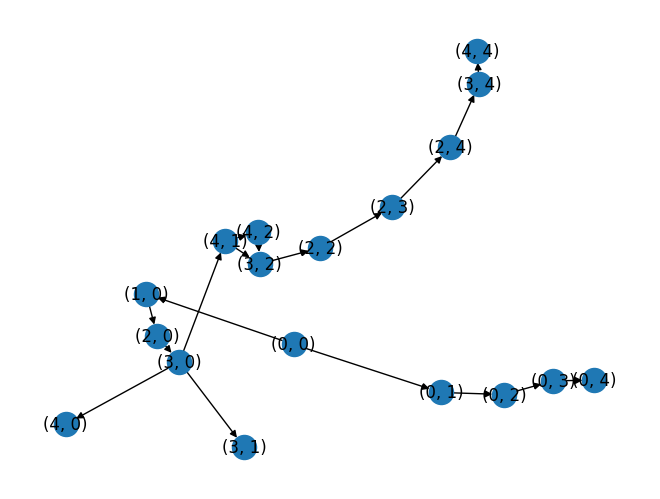

In [17]:
def main():
    with open('input.txt', 'r') as file:
        # read the first line and convert to integer
        algorithmNum = int(file.readline().strip())
        
        # read the second line and convert to integer
        size = int(file.readline().strip())
        
        # create an empty matrix
        matrix = []
        
        # read the rest of the lines and append each row as a list to the matrix
        for line in file:
            matrix.append(list(line.strip()))

    if(algorithmNum == 1):
        path, visited = dfs(matrix,size)
    elif(algorithmNum == 2):
        path, visited = gbfs(matrix,size)
        
    nodeList = list(path)
    #print(visited)
    edges = [((node.parent.i,node.parent.j),(node.i,node.j)) for node in nodeList if node.parent]
    #print(edges)
    T = nx.DiGraph()
    T.add_nodes_from(visited)
    T.add_edges_from(edges)
    nx.draw(T, with_labels=True)
main()